# Exploratory Data Analysis: Multiple Variables Lab II


### Intro and objectives:

#### review methods to explore the distribution of multiple variables

### In this lab you will learn:
1.  How to explore the distribution of multiple variables


## 0. Let's import required libraries and load some data


In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

In [118]:
tips = sns.load_dataset('tips')

In [119]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [120]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 1. Correlation matrix

#### Pandas provides a convenient method to compute the correlation matrix
#### Bear in mind, however, that it only applies to continuous variables


In [121]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [122]:
tips[['total_bill','tip','size']].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


#### Based on the previous results we notice that: (1) the variable `tip` is positively correlated with `total_bill` (0.67) this means that larger total bills drive larger tips, (2) The variable `size` is positively correlated with `total_bill` (0.598) this means that the larger the size of the table the higher the expected bill. (3) the variable `size` is weakly correlated with `tip` (0.489), this means that the larger the size of the table the higher the expected bill.
#### On a practical note levels of correlation larger that 0.6 are considered `strong`


### 2. Heatmaps

#### Seaborn provides a convenient method to compute the correlation matrix


In [123]:
correlationMatrix=tips[['total_bill','tip','size']].corr()

<Axes: >

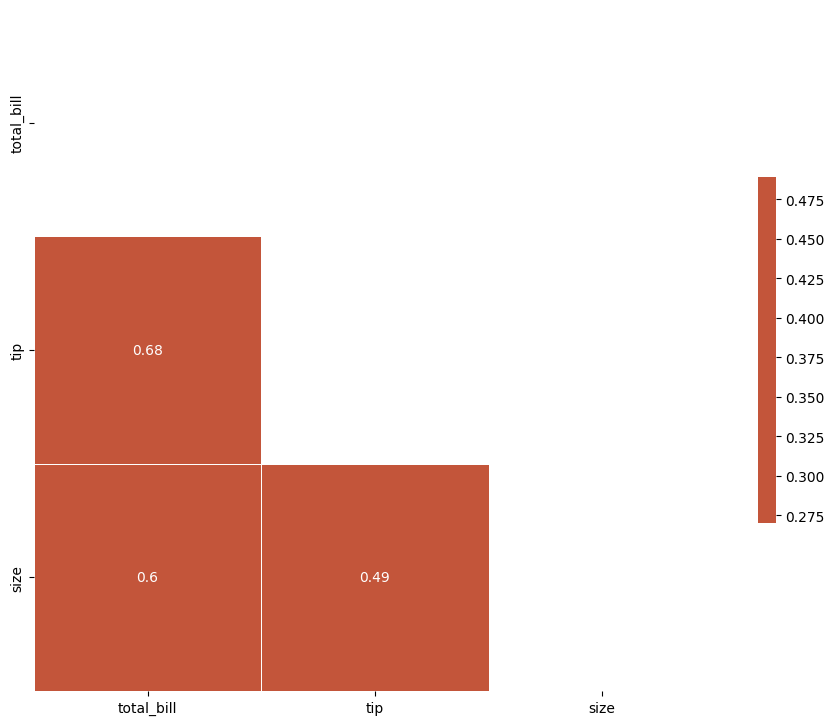

In [124]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlationMatrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlationMatrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

### 3. Distribution of Continuous Variables

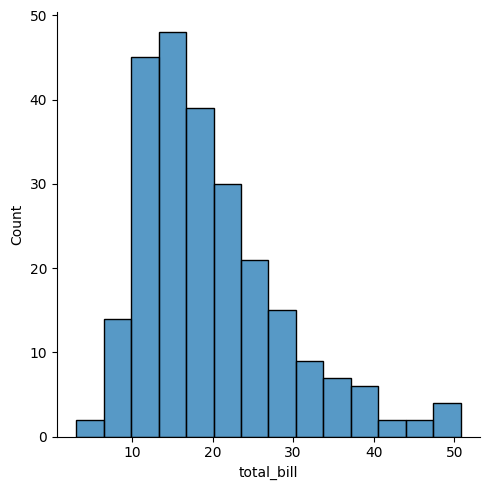

In [125]:
sns.displot(tips['total_bill'])

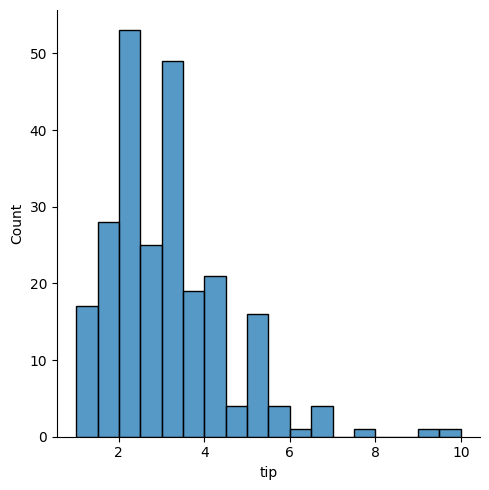

In [126]:
sns.displot(tips['tip'])

### 4. Distribution of Discrete Variables

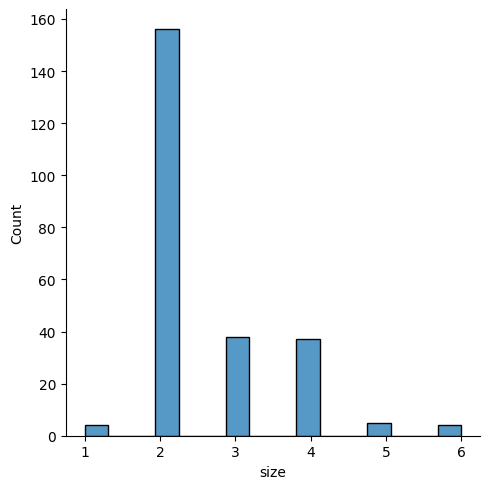

In [127]:
sns.displot(tips['size'])

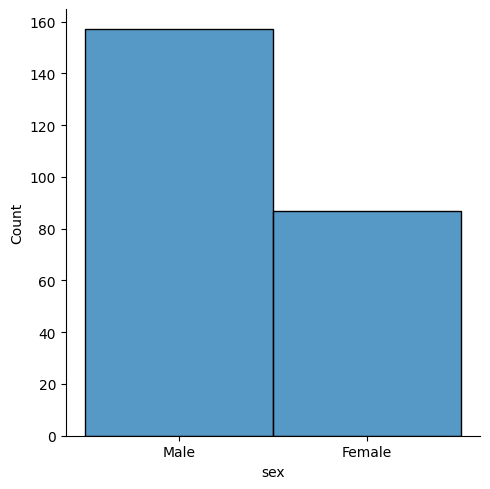

In [128]:
sns.displot(tips['sex'])

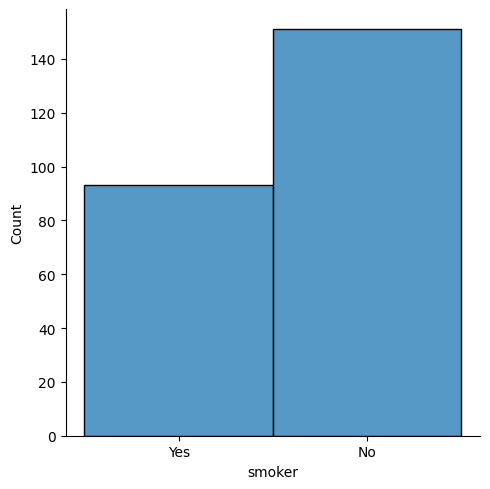

In [129]:
sns.displot(tips['smoker'])

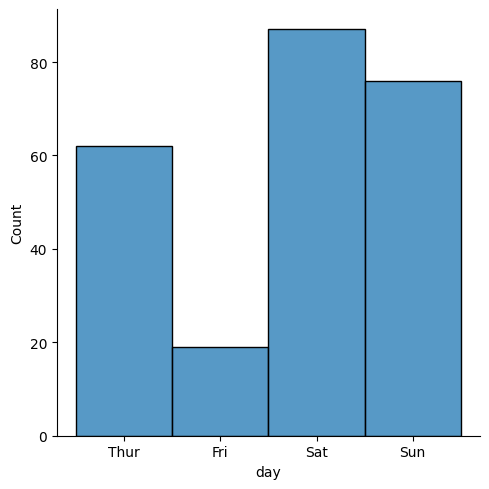

In [130]:
sns.displot(tips['day'])

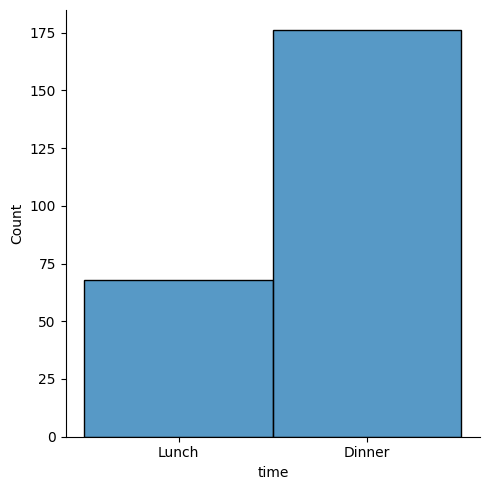

In [131]:
sns.displot(tips['time'])

### 3. ScatterPlots
#### ScattePlots are incredibly useful!

#### 3.1. Relationship between Total Bill and Tip

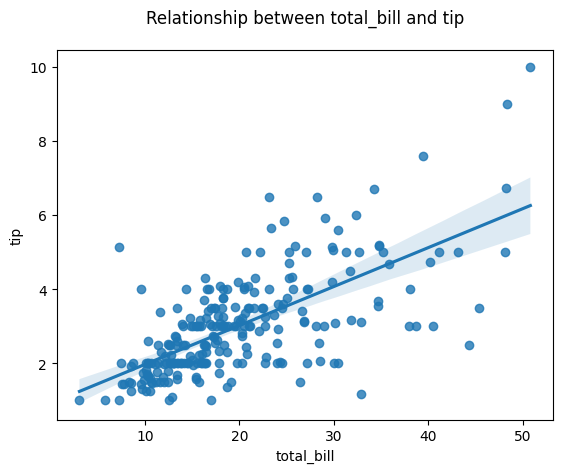

In [132]:
g=sns.regplot(data=tips, x="total_bill", y="tip")
g.set_title('Relationship between total_bill and tip',y=1.05);

In [133]:
#### The previous figure confirms our previous result: larger total bills drive larger tips

#### 3.2. Does gender affect the total_bill, tip relationship?

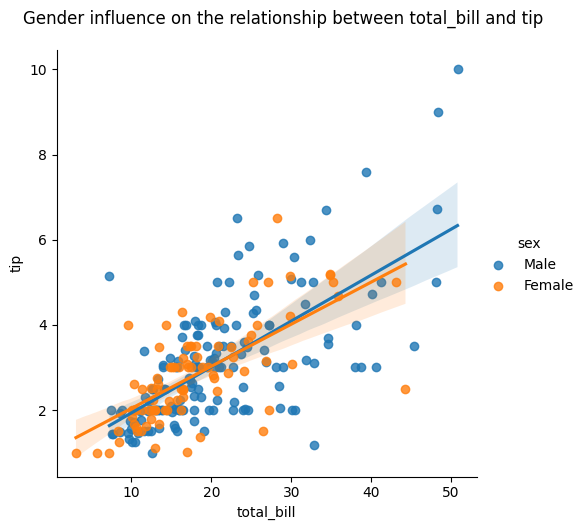

In [134]:
g=sns.lmplot(data=tips, x="total_bill", y="tip",hue='sex')
plt.suptitle('Gender influence on the relationship between total_bill and tip', y=1.05)

plt.show()

#### Based on the previous figure we conclude that Gender does not modify the relationship between total bill and tip

#### 3.2. Does smoking affect the total_bill, tip relationship?

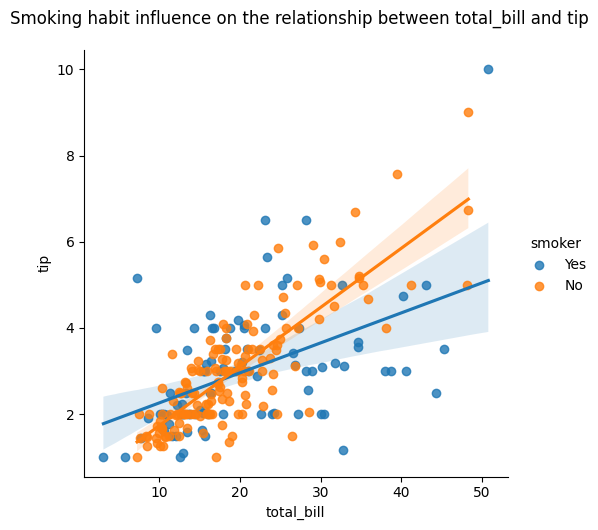

In [135]:
g=sns.lmplot(data=tips, x="total_bill", y="tip",hue='smoker')
plt.suptitle('Smoking habit influence on the relationship between total_bill and tip', y=1.05)

plt.show()

#### Based on the previous figure we conclude that:

1. Smokers tend to give more tips than their non-smoking counterparts for bills lower than 20 dollars.
2. Non-Smokers tend to give more tips than their smoking counterparts for bills larger than 20 dollars.

### 4. Box Plots
#### Box Plots are quite useful to summarize visually the distribution of a variable as well as to explore how discrete variables affect continuous variables.

#### 4.1. Evolution of sales during the week

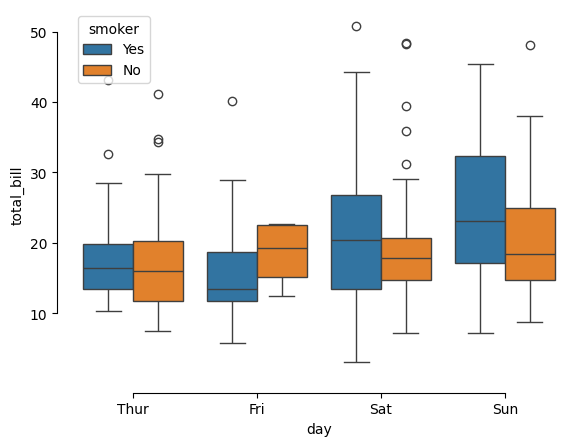

In [136]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips)
sns.despine(offset=10, trim=True)

#### Based on the previous figure we conclude that: (1) weekends are busier than weekdays, (2) smokers tend to spend more than non-smokers on weekends.

#### 4.3. Evolution of sales during the week and time of the day

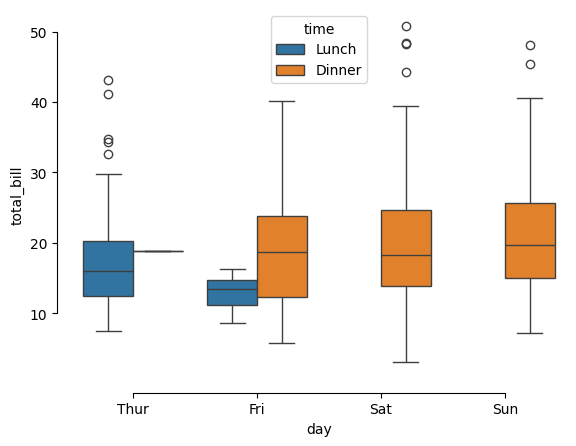

In [137]:
sns.boxplot(x="day", y="total_bill", hue="time",data=tips)
sns.despine(offset=10, trim=True)

<Axes: xlabel='day', ylabel='total_bill'>

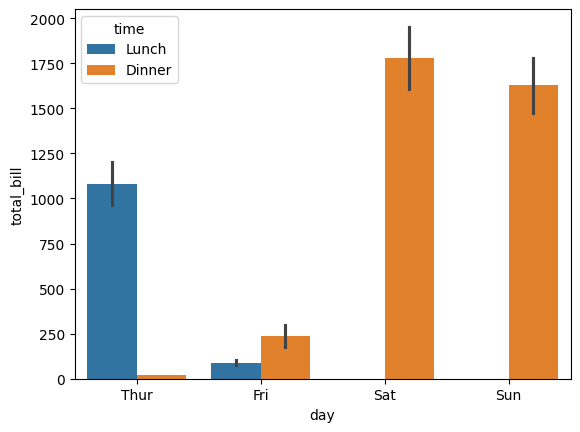

In [138]:
sns.barplot(x="day", y="total_bill", hue="time",data=tips,estimator='sum')

#### Based on the previous figure we conclude that: (1) total bills are larger on weekends, (2) sales are larger on weekends

#### 4.3. Impact of table size on tips

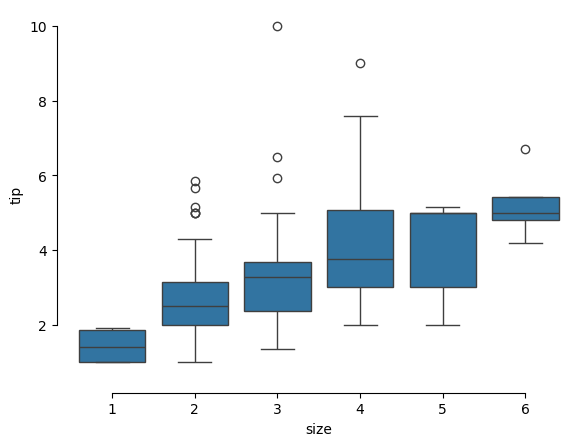

In [139]:
sns.boxplot(x="size", y="tip", data=tips)
sns.despine(offset=10, trim=True)

### Based on the previous figure we conclude that larger tables drive larger tips (this effect is probably driven by the association between table size and total bill)

#### 4.4. Impact of table size on total bills

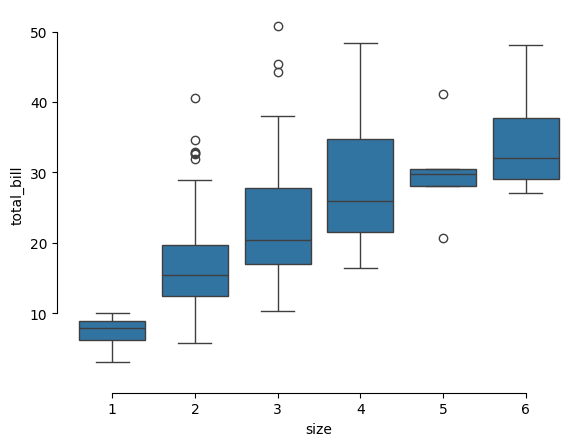

In [140]:
sns.boxplot(x="size", y="total_bill", data=tips)
sns.despine(offset=10, trim=True)

#### Indeed, based on the previous figure we conclude that larger tables lead to larger bills

#### 4.5. When do we need larger tables?

In [141]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [142]:
SalesPerDayTimeAndSize=tips.groupby(['day','time','size'])['total_bill'].sum().reset_index()
SalesPerDayTimeAndSize

,day,time,size,total_bill
0,Thur,Lunch,1,10.07
1,Thur,Lunch,2,708.75
2,Thur,Lunch,3,76.64
3,Thur,Lunch,4,149.75
4,Thur,Lunch,5,41.19
5,Thur,Lunch,6,91.15
6,Thur,Dinner,1,0.00
7,Thur,Dinner,2,18.78
8,Thur,Dinner,3,0.00
9,Thur,Dinner,4,0.00


In [143]:
#we remove zeros to make it more readable
SalesPerDayTimeAndSize[SalesPerDayTimeAndSize['total_bill']>0]

,day,time,size,total_bill
0,Thur,Lunch,1,10.07
1,Thur,Lunch,2,708.75
2,Thur,Lunch,3,76.64
3,Thur,Lunch,4,149.75
4,Thur,Lunch,5,41.19
5,Thur,Lunch,6,91.15
7,Thur,Dinner,2,18.78
12,Fri,Lunch,1,8.58
13,Fri,Lunch,2,65.36
14,Fri,Lunch,3,15.98


In [144]:
## we compose a new column containing day, time and size

SalesPerDayTimeAndSize['daytimesize']=SalesPerDayTimeAndSize['day'].astype(str)+SalesPerDayTimeAndSize['time'].astype(str)+SalesPerDayTimeAndSize['size'].astype(str)
SalesPerDayTimeAndSize

,day,time,size,total_bill,daytimesize
0,Thur,Lunch,1,10.07,ThurLunch1
1,Thur,Lunch,2,708.75,ThurLunch2
2,Thur,Lunch,3,76.64,ThurLunch3
3,Thur,Lunch,4,149.75,ThurLunch4
4,Thur,Lunch,5,41.19,ThurLunch5
5,Thur,Lunch,6,91.15,ThurLunch6
6,Thur,Dinner,1,0.00,ThurDinner1
7,Thur,Dinner,2,18.78,ThurDinner2
8,Thur,Dinner,3,0.00,ThurDinner3
9,Thur,Dinner,4,0.00,ThurDinner4


<ipython-input-145-74144e52a84e>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45);


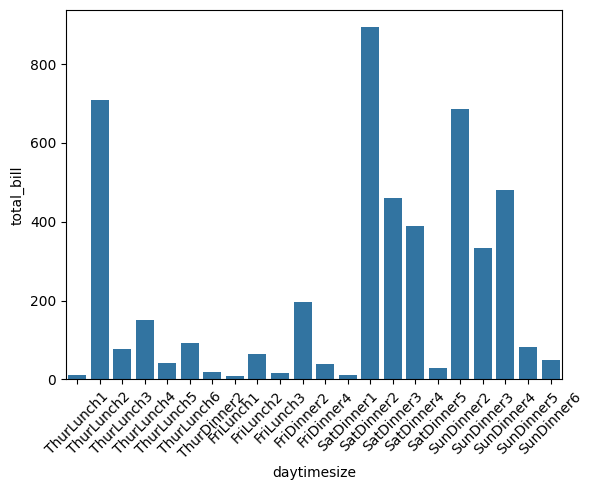

In [145]:
g=sns.barplot(data=SalesPerDayTimeAndSize[SalesPerDayTimeAndSize['total_bill']>0],x='daytimesize',y='total_bill')
g.set_xticklabels(g.get_xticklabels(), rotation=45);